<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy132_veccalc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def point_charge(qa, a, X, Y):
    return np.asarray([qa *(X+a)/( (X+a)**2 + Y**2 ), qa *Y/( (X+a)**2 + Y**2 )])

def point_chargeE(qa, x, X, Y):
    x = -x
    return np.asarray([qa *(X+x[0])/( (X+x[0])**2 + (Y+x[1])**2 ), qa * (Y+x[1])/( (X+x[0])**2 + (Y+x[1])**2 )])

def E_point(q, x, r):
    x = -x    
    return np.asarray([q *(r[0]+x[0])/( (r[0]+x[0])**2 + (r[1]+x[1])**2 ), q * (r[1]+x[1])/( (r[0]+x[0])**2 + (r[1]+x[1])**2 )])


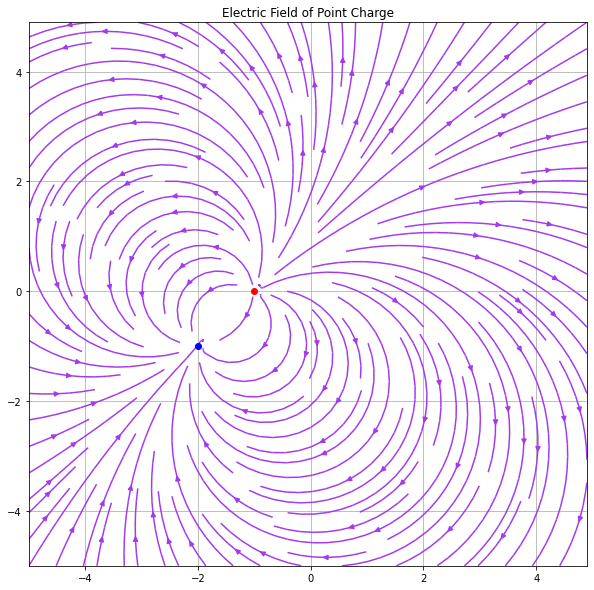

In [ ]:
# 1D arrays
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
  
# Meshgrid
X,Y = np.meshgrid(x,y)
r = np.array([X,Y])  

# Assign vector directions
q1 = 1
q2 = -1
x1 = np.array([-1, 0])
x2 = np.array([-2,-1])

### compute electric field
EExy = point_chargeE(q1, x1, X, Y) + point_chargeE(q2, x2, X, Y)

############################
# Depict illustration
plt.figure(figsize=(10, 10))
plt.streamplot(X,Y,EExy[0],EExy[1], density=1.4, linewidth=None, color="#A23BEC")
plt.plot(x1[0], x1[1],"-or")
plt.plot(x2[0], x2[1],"-ob")
plt.title("Electric Field of Point Charge")
plt.grid()
plt.show()

# Get Divergence of Vector Field

Scalar Field:

e.g. $\rho = \rho_{XYZ}$ (in 3D), yields $\text{grad}(\rho) = \mathcal{E}_{xXYZ} = \begin{pmatrix} \partial_{0} \rho_{XYZ} \\
\partial_{1} \rho_{XYZ} \\ \partial_{2} \rho_{XYZ} \end{pmatrix} $

e.g. $\rho = \rho_{XY}$ (in 2D)

Vector Field, e.g. $\mathcal{E}_{xXYZ}$

Divergence, $\text{div}(\mathcal{E}_{xXYZ}) = \partial_{0} \mathcal{E}_{0XYZ} + \partial_{1} \mathcal{E}_{1XYZ} + \partial_{2} \mathcal{E}_{2XYZ}$

In [ ]:
def grad(s):
    gradient = np.empty([s.ndim] + list(s.shape), dtype=s.dtype)
    for i in range(s.ndim):
        gradient[i] = np.gradient(s, axis=i)
    return gradient

def curl(v):
    """
    Assumes 2D or 3D Vector Field
    """
    if len(v) == 2:
        ### This gets a Scalar Field
        curl    = np.zeros(list(v.shape)[1:], dtype=v.dtype)
        curl    = np.gradient(v[0], axis=1) - np.gradient(v[1], axis=0)
        return curl
    if len(v) == 3:
        curl    = np.zeros(v.shape, dtype=v.dtype)
        curl[0] = np.gradient(v[2], axis=1) - np.gradient(v[1], axis=2)
        curl[1] = np.gradient(v[0], axis=2) - np.gradient(v[2], axis=0)
        curl[2] = np.gradient(v[1], axis=0) - np.gradient(v[0], axis=1)
        return curl
    else:
        return None

def div(v):
    """
    Given a Vector Field get a Scalar Field
    """
    divergence = np.zeros(list(v.shape)[1:], dtype=v.dtype)
    for i in range(len(v)):
        divergence += np.gradient(v[i], axis=i)
    return divergence

def d(v):
    """
    exterior derivative of n-form
    """
    return None

def Λ(A, B):
    """
    Wedge Product of an n-form & m-form, also between operators
    """
    return None

def ʃ(v, S):
    """
    vector field integral requires interpolation!!!
    define a simplicial complex.

    """
    return None

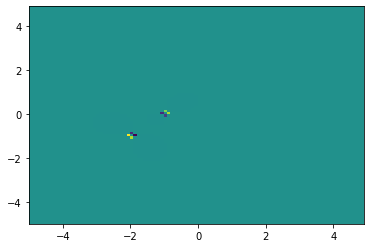

In [ ]:
# Make the plot
plt.pcolormesh(X, Y, div( EExy ), shading='auto')
plt.show()

In [ ]:
np.where( div( EExy ) > 1.5e13 )

(array([39, 40, 50]), array([30, 29, 41]))

In [ ]:
print( x[39], y[30] )
print( x[40], y[29] )
print( x[50], y[41] )
#print( x[51], y[40] )

-1.1000000000000139 -2.0000000000000107
-1.0000000000000142 -2.1000000000000103
-1.7763568394002505e-14 -0.9000000000000146


### Lets Compute the Curl of the Electric Field

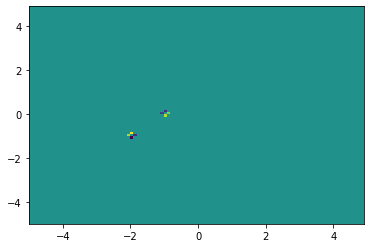

In [ ]:
# Make the plot
plt.pcolormesh(X, Y, curl(EExy), shading='auto')
plt.show()

## $\rho$

Now let's suppose we define a charge (source) on the continuum, want would the electric field be??

$\mathcal{E} = \text{grad}(\mathcal{V})$

$\Delta \mathcal{V} = \rho $

$\mathcal{V} = \Delta^{-1} \rho $

Interpolation can be used to alias a \textit{real} continuum distribution, or at least over a larger length scale.
